In [1]:
# PROYECTO FINAL
#Desarrollo de un Sistema de Análisis de Noticias Salvadoreñas
#Periodico: Última Hora, https://ultimahora.sv/

#GRUPO
#Dionisia Escobar
#Carlos Hurtado
#Roxana Contreras
#Alicia Sanchez
#Luis Tobar

#ACTIVIDAD
#TAREAS ESPECÍFICAS:

# 1. RECOLECCIÓN DE DATOS:
# ● Utilizar técnicas de web scraping para obtener
# noticias del periódico Última Hora (https://ultimahora.sv).
# Se desarrollo un programa para extracción de noticias del 
# periódico digital "Última Hora" y se extrajeron al archivo 
# "Noticias Ultima Hora.csv" para su posterior análisis.

# 2. EDA Y VISUALIZACIÓN DE DATOS:
# ● Realizar un Análisis Exploratorio de Datos (EDA) en las 
# noticias recolectadas.
# ● Agrupar las noticias por fecha y categoría.
# ● Visualizar de manera efectiva los patrones y tendencias 
# encontrados en los datos.

# Se extrajeron los datos del archivo
# "Noticias_Ultima_Hora.csv", ordenándolos por categoría y fecha.
# NOTA: Por limitante de tiempo, quedó pendiente el análisis 
# exploratorio de datos (EDA) y  la visualización de patrones y tendencias.
# Esperamos subirlos la próxima semana.

In [33]:
# Instalando librerias y dependencias

import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import json
import os

*   Función para arreglar fecha y cambiarla a datetime (se devuelve la cadena)
*   Definicion de elemento vacio

In [34]:
# Funcion para arreglar fechas:
from datetime import datetime

meses = ["Ene","Feb","Mar","Abr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic"]

def fecha(cadena):
  cadena = cadena.replace(",","")
  cadena = cadena.replace(":"," ")
  cadena = cadena.strip()

  digitos = [ int (s) for s in cadena.split() if s.isdigit()]

  dia = digitos[0]
  mes = 0
  an = digitos[1]

  for m in meses:
    if m in cadena:
      mes = meses.index(m)+1
    else:
      pass

  return str(datetime(an, mes, dia, digitos[2], digitos[3], 0))

#Prueba:
cadena = "Nov 26, 2023, 14:50 pm"
print(fecha(cadena))
print(datetime.strptime(fecha(cadena),"%Y-%m-%d %H:%M:%S"))

# Elemento vacio
nada = None

2023-11-26 14:50:00
2023-11-26 14:50:00


### urls base

In [35]:
url_base = ["https://ultimahora.sv/category/portada/portada-portada/"]

# Numero de paginas a extraer
paginas = 2

for i in range(paginas):
    if i == 0:
      pass
    else:
      extra = "page/"+str(i+1)+'/'
      url_base.append(url_base[0]+extra)

print(url_base)

['https://ultimahora.sv/category/portada/portada-portada/', 'https://ultimahora.sv/category/portada/portada-portada/page/2/']


* Extracción de urls y títulos
* Eliminación de repetidos

In [36]:
# Recorriendo url_base, buscamos los urls de cada noticia y otros elementos

elementos_temp = []

for url in url_base:
    response = requests.get(url)

    if response.status_code == 200:
        contenido_html = response.text
        soup = BeautifulSoup(contenido_html, 'html.parser')

        for post in soup.select('h3', class_='image-post-title feature_2col'):
            # Extracción de url y titulo
            if post.find('a'):
                url_tem = post.find('a').get('href')
                title_tem = post.text.strip()
                elementos_temp.append((url_tem, title_tem))
            else:
                pass
    else:
        print(f"No se pudo obtener la página. Código de estado: {response.status_code}")

n = len(set(elementos_temp))

# Quitando urls repetidas
indice = 0
while indice < n:
    elemento_actual = elementos_temp[indice]
    if elementos_temp.count(elemento_actual) > 1:
        elementos_temp.remove(elemento_actual)
    else:
        indice += 1

print(elementos_temp)
print(len(elementos_temp))

[('https://ultimahora.sv/renuncia-rector-de-la-uca/', 'Renuncia rector de la UCA'), ('https://ultimahora.sv/garantizan-calidad-de-vida-de-sonsonatecos-con-proyectos-de-desarrollo/', 'Garantizan calidad de vida de sonsonatecos con proyectos de desarrollo'), ('https://ultimahora.sv/continuan-trabajos-de-renovacion-en-espacios-publicos-del-pais/', 'Continúan trabajos de renovación en espacios públicos del país'), ('https://ultimahora.sv/salvadorenos-revelan-que-nunca-votarian-por-arena-y-el-fmln/', 'Salvadoreños revelan que “nunca votarían” por ARENA y el FMLN'), ('https://ultimahora.sv/alexia-rivas-estas-fiestas-de-fin-de-ano-estaran-llenas-de-tranquilidad-y-paz/', 'Alexia Rivas: “Estas fiestas de fin de año, estarán llenas de tranquilidad y paz”'), ('https://ultimahora.sv/el-salvador-espera-visita-de-1-3-millones-de-turistas-por-temporada-navidena/', 'El Salvador espera visita de 1.3 millones de turistas por temporada navideña'), ('https://ultimahora.sv/el-salvador-y-honduras-bajo-estad

* Registro de: url, title
* Extracción de: author, content, publication_date, category_id

In [37]:
# Hay que llenar estas listas para el dataframe

author = []
title = []
content = []
date = []
url = []
category = []
sourse = []
type_ = []

for elemento in elementos_temp:
    new = elemento[0]
    response = requests.get(new)

    if response.status_code == 200:

        # Registro de url
        url.append(new)

        # Registro del título
        title.append(elemento[1])

        #La sopa
        soup = BeautifulSoup(response.text, 'html.parser')

        # Extracción del author
        author_element = soup.select_one("div.author-name")
        author.append(author_element.text.strip().replace("Por ", "") if author_element else nada)

        # Extracción de la fecha de publicación
        date_element = soup.find("span", class_="post-date updated")
        date.append(fecha(date_element.text.strip()) if date_element else nada)

        # Extracción del contenido
        content_elements = soup.select('div.post_content')
        content_text = ' '.join(element.text.strip() for element in content_elements)
        content_text = content_text.replace("\n", " ").replace("\t", " ").replace("\xa0", " ")
        content.append(content_text)

        # Extracción de la categoría
        category_element = soup.select_one("span.meta-category-small")
        category.append(category_element.text if category_element else nada)

    else:
        print(f"No se pudo obtener la página. Código de estado: {response.status_code}")

* DataFrame
* Registro de: sourse_id, sourse_type

In [38]:
# Haciendo el dataframe
data= pd.DataFrame({'author_id': author,'title': title, "content": content, 'publication_date': date, 'url': url, 'category_id': category})

# Registro de fuente
data["sourse_id"]= "Última Hora SV"

# Registro de tipo de fuente
data["sourse_type"]= 'Web Page'

data

,author_id,title,content,publication_date,url,category_id,sourse_id,sourse_type
0,Redacción UH,Renuncia rector de la UCA,"La tarde de este viernes 8 de diciembre, se di...",2023-12-08 19:13:00,https://ultimahora.sv/renuncia-rector-de-la-uca/,Clase políticaLo último,Última Hora SV,Web Page
1,Redacción UH,Garantizan calidad de vida de sonsonatecos con...,Los habitantes de Sonsonate ahora pueden disfr...,2023-12-08 18:51:00,https://ultimahora.sv/garantizan-calidad-de-vi...,NacionalesportadaPortada,Última Hora SV,Web Page
2,Redacción UH,Continúan trabajos de renovación en espacios p...,"El Gobierno, en beneficio de los salvadoreños,...",2023-12-08 11:35:00,https://ultimahora.sv/continuan-trabajos-de-re...,Nacionalesportada,Última Hora SV,Web Page
3,Redacción UH,Salvadoreños revelan que “nunca votarían” por ...,En la más reciente encuesta del Instituto Univ...,2023-12-08 08:08:00,https://ultimahora.sv/salvadorenos-revelan-que...,Clase políticaLo último,Última Hora SV,Web Page
4,Redacción UH,"Alexia Rivas: “Estas fiestas de fin de año, es...","Durante la Plenaria 135, los diputados de la A...",2023-12-07 15:52:00,https://ultimahora.sv/alexia-rivas-estas-fiest...,Clase política,Última Hora SV,Web Page
5,Redacción UH,El Salvador espera visita de 1.3 millones de t...,Las festividades de Navidad y Fin de Año están...,2023-12-07 11:21:00,https://ultimahora.sv/el-salvador-espera-visit...,Lo Últimoportada,Última Hora SV,Web Page
6,Redacción UH,El Salvador y Honduras bajo estados de excepci...,El Salvador se encuentra en estado de excepció...,2023-12-07 08:44:00,https://ultimahora.sv/el-salvador-y-honduras-b...,Lo Último,Última Hora SV,Web Page
7,Redacción UH,Entregan renovado estacionamiento en Hospital ...,El Gobierno de El Salvador ha finalizado con l...,2023-12-07 07:54:00,https://ultimahora.sv/entregan-renovado-estaci...,Lo Últimoportada,Última Hora SV,Web Page
8,Redacción UH,Encuesta confirma que Nuevas Ideas seguirá com...,El más reciente estudio de opinión pública rea...,2023-12-07 07:29:00,https://ultimahora.sv/encuesta-confirma-que-nu...,Clase políticaLo Último,Última Hora SV,Web Page
9,Redacción UH,Subsecretaria de la ONU destaca liderazgo y co...,En la Conferencia de las Partes de la Convenci...,2023-12-06 21:50:00,https://ultimahora.sv/subsecretaria-de-la-onu-...,NacionalesportadaPortada,Última Hora SV,Web Page


Almacenamiento

In [39]:
# Guardar todo el contenido del DataFrame en un archivo CSV
data.to_csv('Noticias Ultima Hora.csv', index=False)

# Generar un archivo de texto para comprobar el contenido guardado
with open('Noticias Ultima Hora.txt', 'w', encoding='utf-8') as file:
    for index, row in data.iterrows():
        file.write(f'Título: {row["title"]}\n')
        file.write(f'Autor: {row["author_id"]}\n')
        file.write(f'Fecha de Publicación: {row["publication_date"]}\n')
        file.write(f'Contenido: {row["content"]}\n')
        file.write(f'Categoría: {row["category_id"]}\n')
        file.write(f'URL: {row["url"]}\n')
        file.write(f'Fuente: {row["sourse_id"]}\n')
        file.write(f'Tipo de fuente: {row["sourse_type"]}\n')
        file.write('\n' + '-'*50 + '\n\n')

# Guardar todo el contenido del DataFrame en un archivo JSON
data.to_json('Noticias Ultima Hora.json', orient='records', lines=True)


In [43]:
# Leer el archivo CSV
data = pd.read_csv('Noticias Ultima Hora.csv')

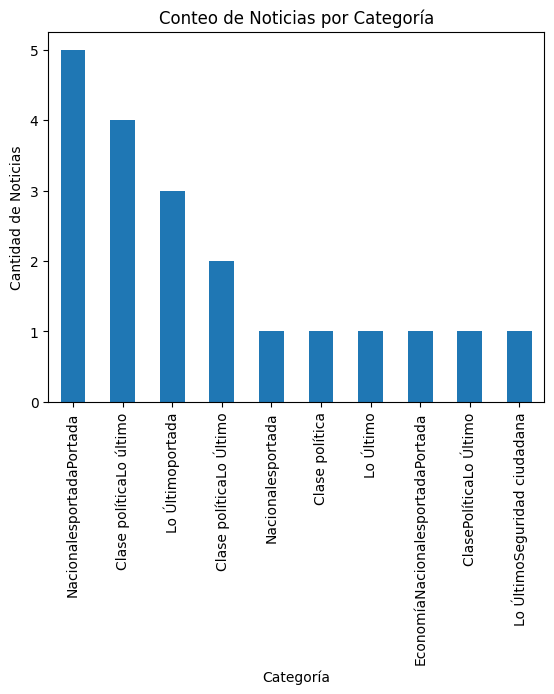

In [41]:
# Generar un gráfico de barras por categoría
category_counts = data['category_id'].value_counts()
category_counts.plot(kind='bar')
plt.title('Conteo de Noticias por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Noticias')
plt.show()


In [44]:
# Guardar todo el contenido del DataFrame en un archivo CSV
data.to_csv('Noticias Ultima Hora.csv', index=False)

In [45]:
# Generar un archivo de texto para comprobar el contenido guardado
with open('Noticias Ultima Hora.txt', 'w', encoding='utf-8') as file:
    for index, row in data.iterrows():
        file.write(f'Título: {row["title"]}\n')
        file.write(f'Autor: {row["author_id"]}\n')
        file.write(f'Fecha de Publicación: {row["publication_date"]}\n')
        file.write(f'Contenido: {row["content"]}\n')
        file.write(f'Categoría: {row["category_id"]}\n')
        file.write(f'URL: {row["url"]}\n')
        file.write(f'Fuente: {row["sourse_id"]}\n')
        file.write(f'Tipo de fuente: {row["sourse_type"]}\n')
        file.write('\n' + '-'*50 + '\n\n')

In [46]:
# Guardar todo el contenido del DataFrame en un archivo JSON
data.to_json('Noticias Ultima Hora.json', orient='records', lines=True)